<a href="https://colab.research.google.com/github/Prasanthsrinivas/customer_conversion_prediction/blob/main/customer_coversion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot


In [78]:
data=pd.read_csv("/content/train.csv")
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [79]:
data.nunique(axis=0)

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

Class 0: 39922
Class 1: 5289
Proportion of class 0 is  88.3 %


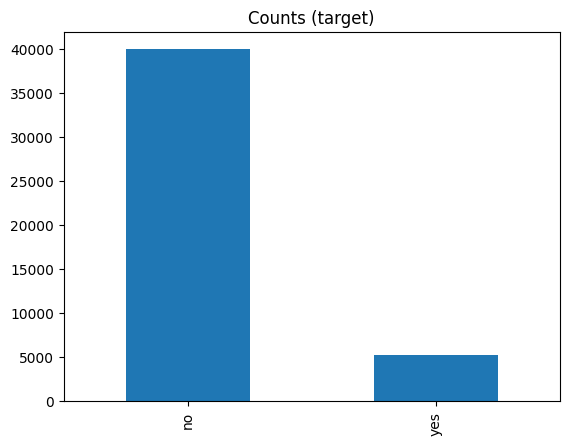

In [80]:
target_count = data.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Counts (target)');

In [81]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [82]:
data.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [83]:
data.shape

(45211, 11)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [85]:
 data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [86]:
data.dropna(inplace = True)

In [87]:
data[data.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [88]:
data.drop_duplicates(inplace=True)

In [89]:
data.shape

(45205, 11)

In [90]:
data.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


getting total of each columns in bar in %

In [91]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')


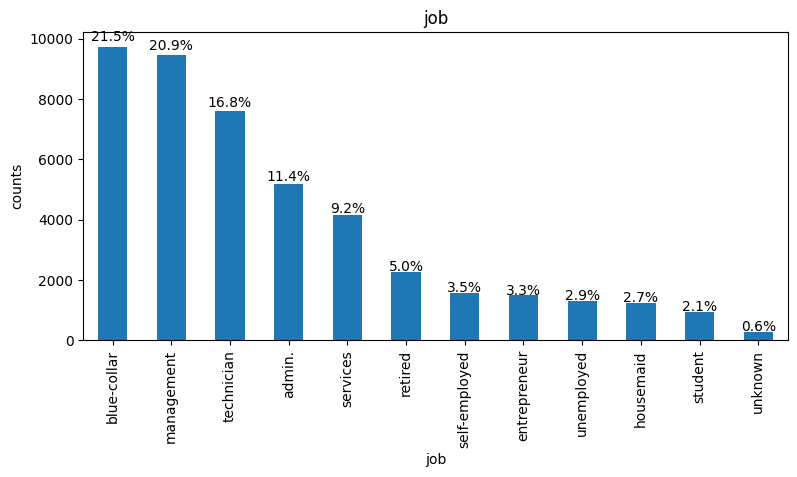

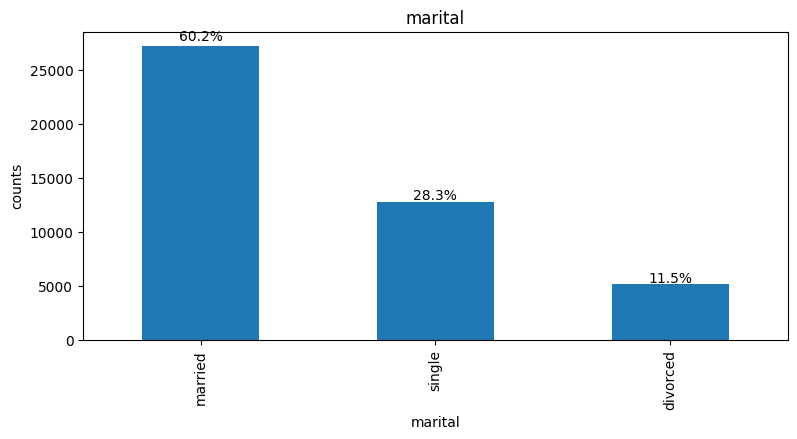

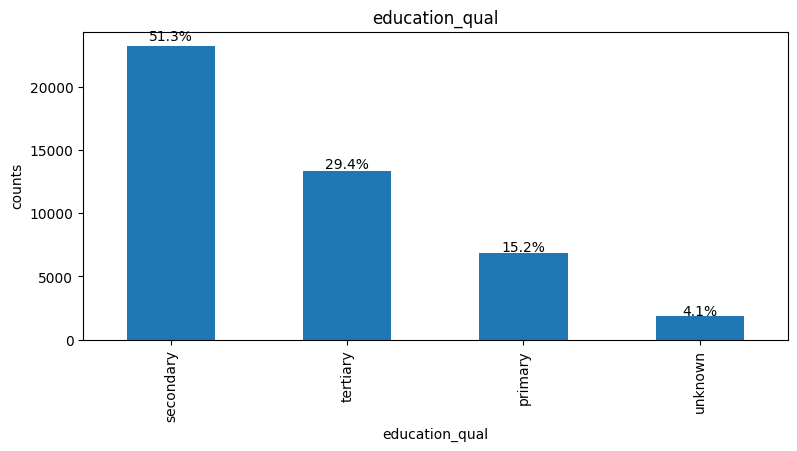

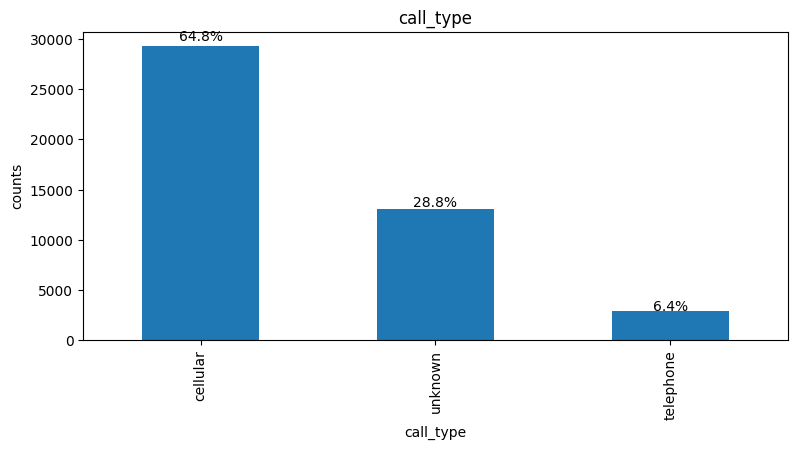

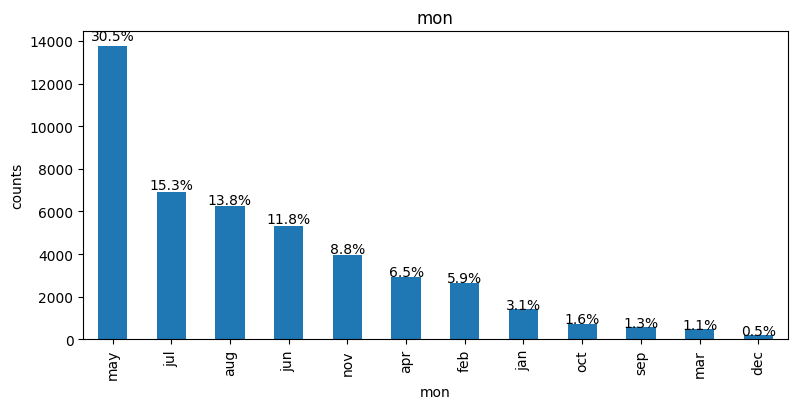

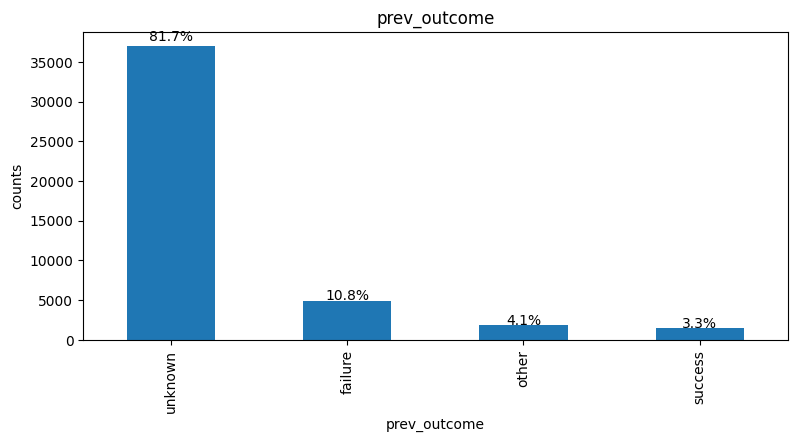

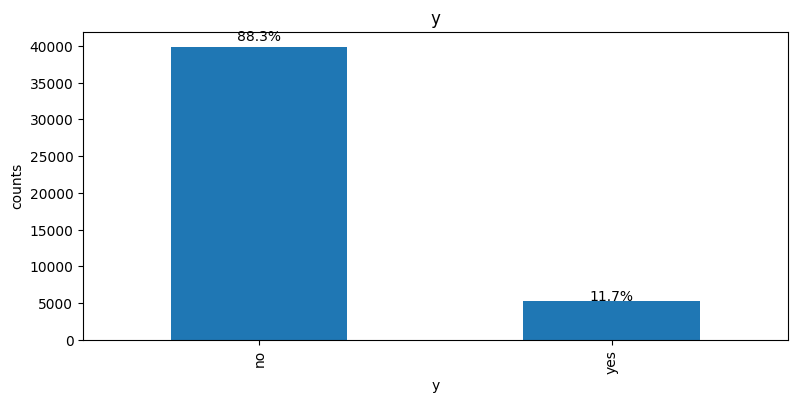

In [92]:
#each column reesults by %

cat_var=data.select_dtypes(include=["object"]).columns
print(cat_var)

for column in cat_var:
  plt.figure(figsize=(20,4))
  ax=plt.subplot(121)
  data[column].value_counts().plot(kind="bar")
  plt.xlabel(column)
  plt.ylabel("counts")
  plt.title(column)


  total=sum([p.get_height() for p in ax.patches])
  for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.annotate(f"{height/total:.1%}",(x + width/2,y +height*1.02),ha="center")

In [93]:
# impute unknown to mode fr job and educational qual
impute=["job","education_qual"]
for column in impute:
  mode=data[column].mode()[0]
  data[column]=data[column].replace("unknown",mode)

checking for outliers


<Axes: xlabel='age'>

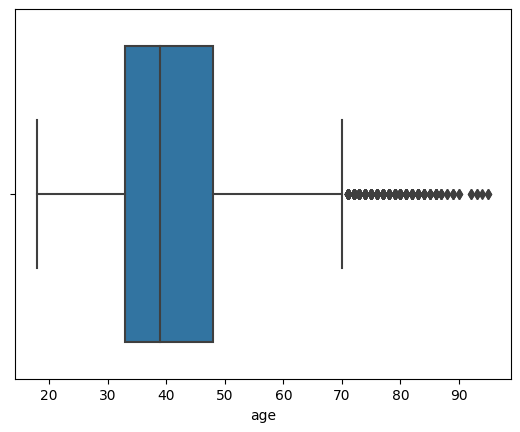

In [94]:
sns.boxplot(x="age",data=data)

<Axes: xlabel='day'>

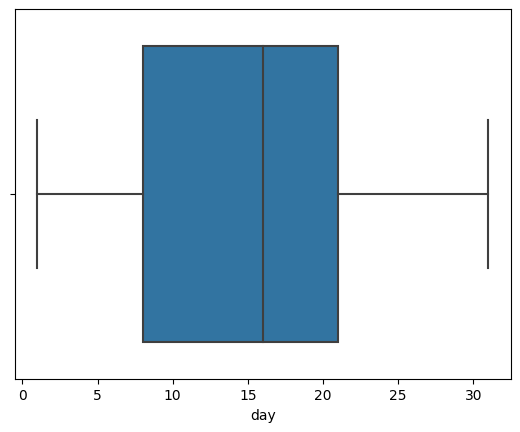

In [95]:
sns.boxplot(x="day",data=data)

<Axes: xlabel='dur'>

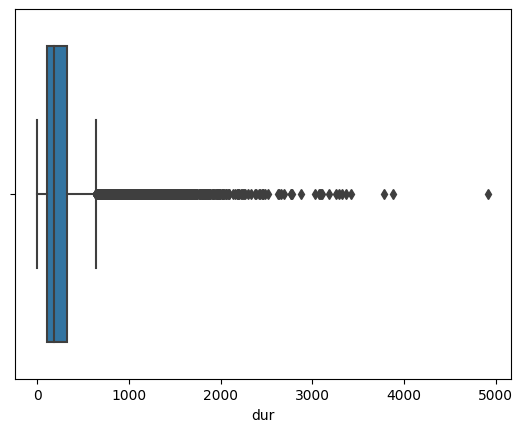

In [96]:
sns.boxplot(x="dur",data=data)

<Axes: xlabel='num_calls'>

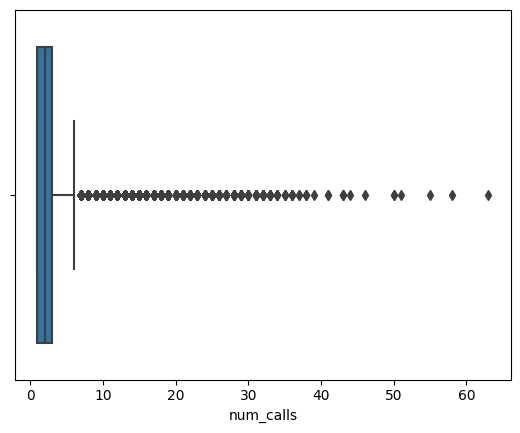

In [97]:
sns.boxplot(x="num_calls",data=data)

In [98]:
data.age.quantile(0.25)

33.0

In [99]:
data.age.quantile(0.75)

48.0

clipping values

In [100]:
iqr = data.age.quantile(0.75) - data.age.quantile(0.25)
iqr
upper_threshold = data.age.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = data.age.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
upper_threshold,lower_threshold
data.age= data.age.clip(lower_threshold, upper_threshold)

In [101]:
iqr = data.dur.quantile(0.75) - data.dur.quantile(0.25)
iqr
upper_threshold = data.dur.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = data.dur.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
upper_threshold,lower_threshold
data.dur= data.dur.clip(lower_threshold, upper_threshold)

In [102]:
iqr = data.num_calls.quantile(0.75) - data.num_calls.quantile(0.25)
iqr
upper_threshold = data.num_calls.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = data.num_calls.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
upper_threshold,lower_threshold
data.num_calls= data.num_calls.clip(lower_threshold, upper_threshold)

<Axes: xlabel='age'>

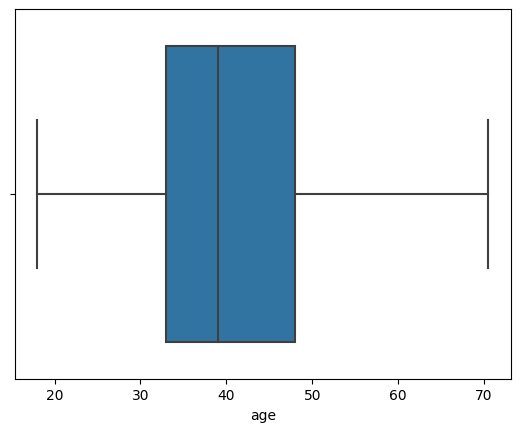

In [103]:
sns.boxplot(x="age",data=data)

<Axes: xlabel='dur'>

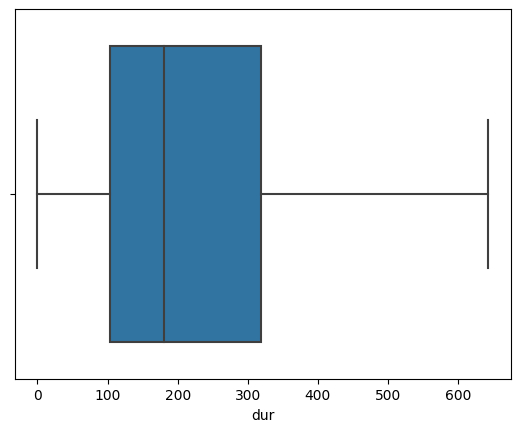

In [104]:
sns.boxplot(x="dur",data=data)

<Axes: xlabel='num_calls'>

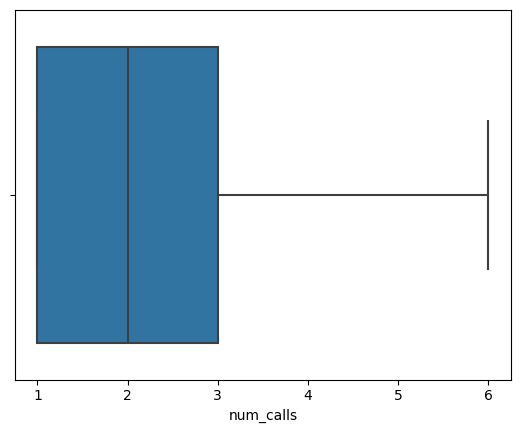

In [105]:
sns.boxplot(x="num_calls",data=data)

In [106]:
data.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.869052,15.80688,234.95620,2.392235
std,10.395247,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,70.500000,31.00000,643.00000,6.000000


In [107]:
#mapp
data["y"]=data["y"].map({"yes": 1,"no":0})

EDA

In [108]:
data.corr()

<ipython-input-108-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,day,dur,num_calls,y
age,1.000000,-0.008899,-0.014351,0.025793,0.018946
day,-0.008899,1.000000,-0.039335,0.153025,-0.028371
dur,-0.014351,-0.039335,1.000000,-0.100056,0.390642
num_calls,0.025793,0.153025,-0.100056,1.000000,-0.084067
y,0.018946,-0.028371,0.390642,-0.084067,1.000000


<Axes: xlabel='job'>

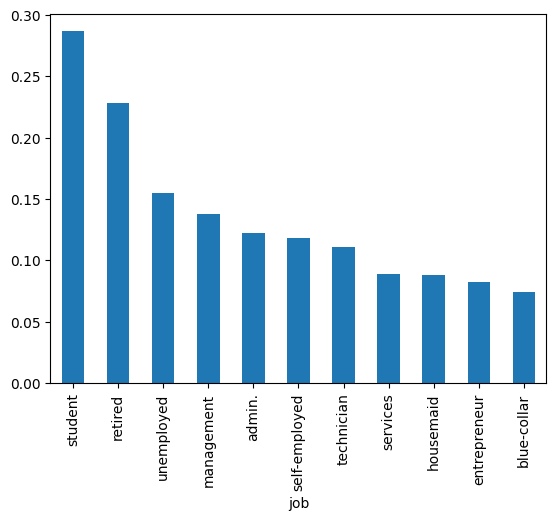

In [109]:
data.groupby("job")["y"].mean().sort_values(ascending=False).plot(kind="bar")

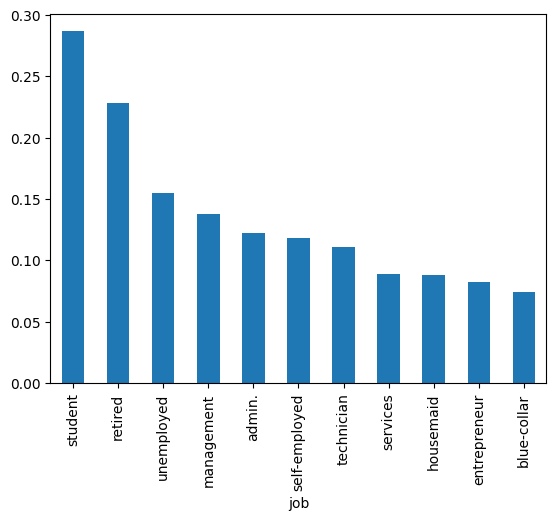

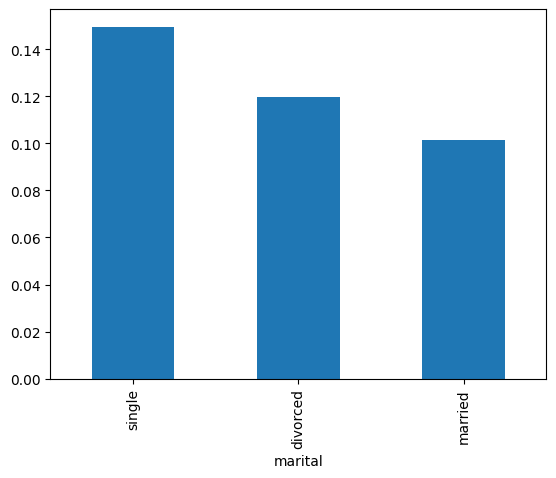

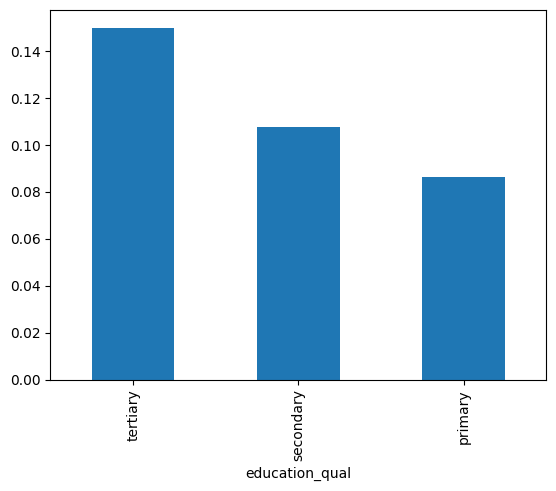

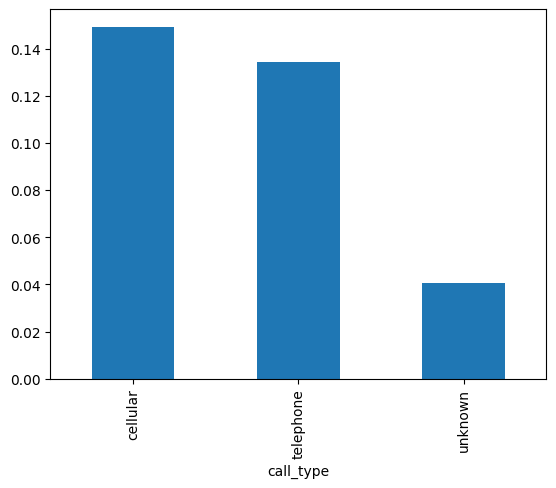

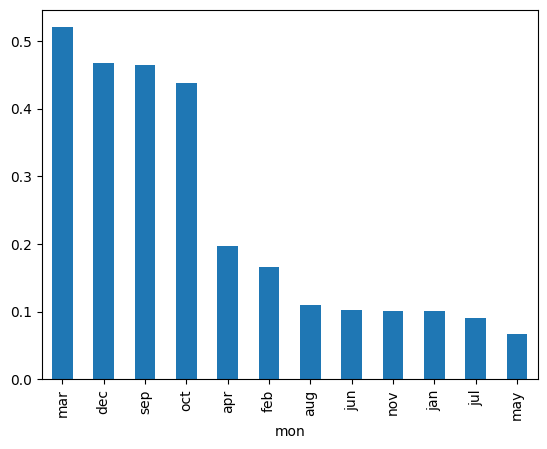

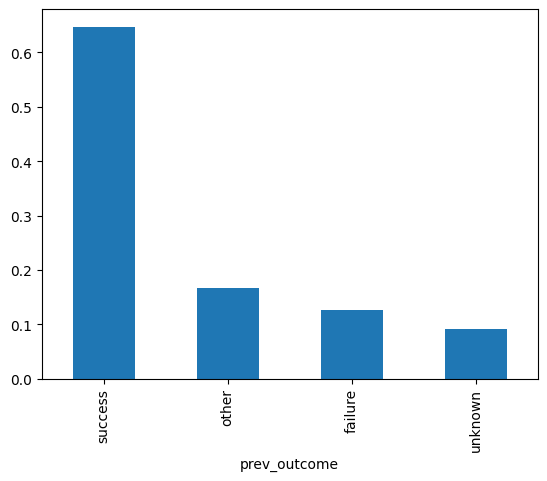

In [110]:
# to compare ft with target

cat_var=data.select_dtypes(include=["object"]).columns
for column in cat_var:
  data.groupby(column)["y"].mean().sort_values(ascending=False).plot(kind="bar")
  plt.show()


In [111]:
df=data.select_dtypes(include=['object']).copy()
df

,job,marital,education_qual,call_type,mon,prev_outcome
0,management,married,tertiary,unknown,may,unknown
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
3,blue-collar,married,secondary,unknown,may,unknown
4,blue-collar,single,secondary,unknown,may,unknown
...,...,...,...,...,...,...
45206,technician,married,tertiary,cellular,nov,unknown
45207,retired,divorced,primary,cellular,nov,unknown
45208,retired,married,secondary,cellular,nov,success
45209,blue-collar,married,secondary,telephone,nov,unknown


encoding

In [112]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
LE=LabelEncoder()
OHE=OneHotEncoder() 

In [113]:
data["job"]=LE.fit_transform(data["job"])
data["job"].unique()

array([ 4,  9,  2,  1,  5,  0,  7,  6, 10,  3,  8])

In [114]:
data["marital"]=LE.fit_transform(data["marital"])
data["marital"].unique()

array([1, 2, 0])

In [115]:
data["education_qual"]=LE.fit_transform(data["education_qual"])
data["education_qual"].unique()

array([2, 1, 0])

In [116]:
data["call_type"]=LE.fit_transform(data["call_type"])
data["call_type"].unique()

array([2, 0, 1])

In [117]:
data["prev_outcome"]=LE.fit_transform(data["prev_outcome"])
data["prev_outcome"].unique()

array([3, 0, 1, 2])

In [118]:
data["mon"]=LE.fit_transform(data["mon"])
data["mon"].unique()

array([ 8,  6,  5,  1, 10,  9,  2,  4,  3,  7,  0, 11])

In [119]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,4,1,2,2,5,8,261,1,3,0
1,44.0,9,2,1,2,5,8,151,1,3,0
2,33.0,2,1,1,2,5,8,76,1,3,0
3,47.0,1,1,1,2,5,8,92,1,3,0
4,33.0,1,2,1,2,5,8,198,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9,1,2,0,17,9,643,3,3,1
45207,70.5,5,0,0,0,17,9,456,2,3,1
45208,70.5,5,1,1,0,17,9,643,5,2,1
45209,57.0,1,1,1,1,17,9,508,4,3,0


In [120]:
df=data.select_dtypes(include=['object']).copy()
df

""
0
1
2
3
4
...
45206
45207
45208
45209


metric trap

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

labels = data.columns[:10]
data = data.dropna()

X = data[labels]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.89%


In [122]:
labels

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome'],
      dtype='object')

In [123]:
model = DecisionTreeClassifier()
model.fit(X_train[['marital']], y_train)
y_pred = model.predict(X_test[['marital']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.55%


confusion mat

Confusion matrix:
 [[8006    0]
 [1035    0]]


<ipython-input-124-96c9cf6f5266>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-124-96c9cf6f5266>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


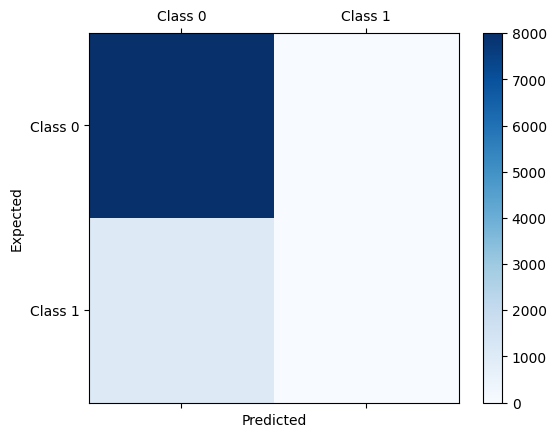

In [124]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

con_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', con_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(con_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

here accuracy is bad
and this isn't predicting class1 in confusion matrix

In [125]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test[['marital']])[:, 1])

0.5500885809073146

sampling

In [126]:
# Class count
count_class_0, count_class_1 = data.y.value_counts()

# by class
df_class_0 = data[data['y'] == 0]
df_class_1 = data[data['y'] == 1]

count_class_0, count_class_1


(39916, 5289)

Random under-sampling

Random under-sampling:
0    5289
1    5289
Name: y, dtype: int64


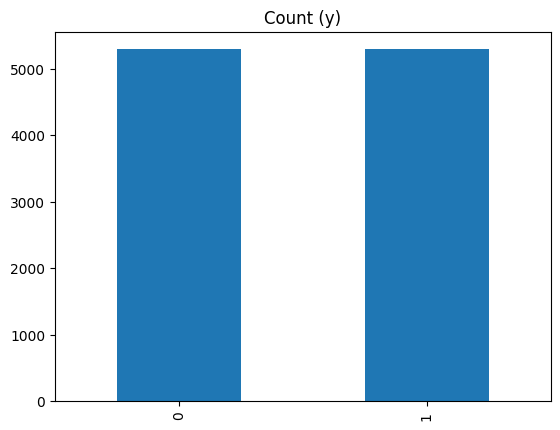

In [127]:
df_class_0_under = df_class_0.sample(count_class_1) # randomly sample count_class_1 
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.y.value_counts())

df_test_under.y.value_counts().plot(kind='bar', title='Count (y)');

random over sampling

Random over-sampling:
0    39916
1    39916
Name: y, dtype: int64


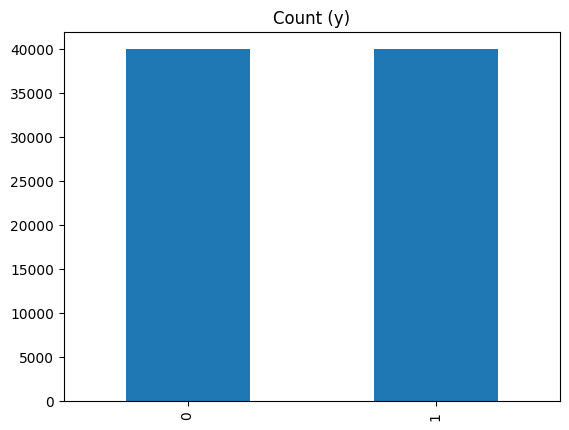

In [128]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.y.value_counts())

df_test_over.y.value_counts().plot(kind='bar', title='Count (y)');

scaling

In [129]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaledX = scale.fit_transform(X,y)
print(X,y)


        age  job  marital  education_qual  call_type  day  mon  dur  \
0      58.0    4        1               2          2    5    8  261   
1      44.0    9        2               1          2    5    8  151   
2      33.0    2        1               1          2    5    8   76   
3      47.0    1        1               1          2    5    8   92   
4      33.0    1        2               1          2    5    8  198   
...     ...  ...      ...             ...        ...  ...  ...  ...   
45206  51.0    9        1               2          0   17    9  643   
45207  70.5    5        0               0          0   17    9  456   
45208  70.5    5        1               1          0   17    9  643   
45209  57.0    1        1               1          1   17    9  508   
45210  37.0    2        1               1          0   17    9  361   

       num_calls  prev_outcome  
0              1             3  
1              1             3  
2              1             3  
3              

In [130]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
import imblearn

Random under-sampling and over-sampling with imbalanced-learn

Random under-sampling and over-sampling with 

In [132]:
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler() # model
X_rus, y_rus = rus.fit_resample(X, y) #fitting


In [133]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler() # model 
X_ros, y_ros = ros.fit_resample(X, y) #Fitting


In [134]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy={0: 20})
X_cc, y_cc = cc.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [135]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [136]:
from imblearn.combine import SMOTEENN #(SMOTE + ENN links)

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X, y)


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
lr.score(X,y)
print( "AUROC  : ",roc_auc_score(y, lr.predict_proba(X)[:, 1]))

AUROC  :  0.8392572052094045


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [138]:
dt = DecisionTreeClassifier()
dt.fit(X_smt, y_smt)
dt.score(X,y)
print( "AUROC : ",roc_auc_score(y, dt.predict_proba(X)[:, 1]))


AUROC :  0.939618412790513


In [139]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_smt,y_smt) 
rf.score(X,y)  
print( "AUROC : ",roc_auc_score(y, rf.predict_proba(X)[:, 1]))


AUROC :  0.9752101885125335


In [140]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_smt, y_smt)
model.score(X,y)
print( "AUROC : ",roc_auc_score(y, model.predict_proba(X)[:, 1]))


AUROC :  0.9454362575096491


In [147]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(X_smt, y_smt) 
  print( "AUROC : ",i ," = " ,roc_auc_score(y, knn.predict_proba(X)[:, 1]))
  #print("K value :", i, "Train Score : ", knn.score(X_smt,y_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_smt, y_smt, cv=10)))

AUROC :  1  =  0.9013237758642743
AUROC :  2  =  0.9111797589269097
AUROC :  3  =  0.9177604032942615
AUROC :  4  =  0.9229343026102594
AUROC :  5  =  0.9264831500660746
AUROC :  6  =  0.9280860860937103
AUROC :  7  =  0.9287320848730338
AUROC :  8  =  0.9286304036737689
AUROC :  9  =  0.9275250051957286
AUROC :  10  =  0.9258718289500785
AUROC :  20  =  0.9056259968584813
AUROC :  30  =  0.8898892746615124
AUROC :  40  =  0.8793455858361361
AUROC :  50  =  0.8712945867547033


#AUROC :  7  =  0.9287320848730338 best

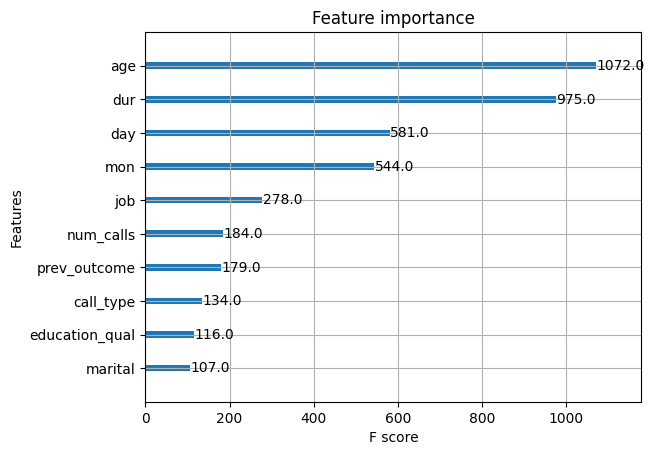

In [142]:
from xgboost import plot_importance
# plot feature importance
plot_importance(model)
plt.show()


AUROC:
#LogisticRegression -0.839
#DecisionTreeClassifier -0.939
#Randomforest -0.975
#KNN -AUROC :  7  =  0.9287320848730338
#XGBClassifier-0.945
